In [46]:
import numpy as np
import pandas as pd
import re
import difflib
import seaborn as sns
import math
import matplotlib.pyplot as plt 
import scipy.stats
%matplotlib inline
from math import factorial

In [47]:
!ls

All_things_stats.ipynb                 Menu_Data_Cleansing_EDA-Copy2.ipynb
MenuList_Dish_Data_Cleansing_EDA.ipynb Menu_Data_Cleansing_EDA.ipynb
Menu_Cleanse.csv                       Structured_Menu.csv
Menu_Data_Cleansing_EDA-Copy1.ipynb


**Read Data**

In [48]:
df     = pd.read_csv("Structured_Menu.csv")

**Some Probabilities**

1) Given equal opportunity of going to Norddeutscher Lloyd Bremen, probability that it was a breakfast event is :

In [49]:
event = len(df[(df.location == "norddeutscher lloyd bremen") & (df.eventt == 'breakfast')])
space = len(df[df.location == "norddeutscher lloyd bremen"])
print("Event :", event, "   Space:", space, "   Probability = ", event / space )

Event : 126    Space: 688    Probability =  0.18313953488372092


In [50]:
df[(df.year > 2001)]

,Unnamed: 0,Unnamed: 0.1,id_x,event,venue,occasion,location,status,dish_count,year,...,dish_id,id_y,name,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
4593,4593,4596,20962,dinner,restaurant,NaN,diner restaurant,complete,41,2005,...,155,155,Oatmeal,NaN,532,610,1,1988,0.00,20.00
4594,4594,4597,20966,dinner,restaurant,NaN,the modern,complete,29,2008,...,1311,1311,Neufchatel,NaN,430,489,1882,1963,0.10,30.00
6353,6353,6359,23157,dinner,other loft apartment,NaN,whisk ladle supper club,complete,5,2008,...,2767,2767,"Potatoes, lyonnaise",NaN,219,225,1889,1959,0.00,20.00
6481,6481,6487,23314,chef s tasting menu,restaurant,NaN,per se,complete,31,2006,...,103,103,Kippered Herring,NaN,231,236,1,1970,0.00,0.85
6540,6540,6546,23385,lunch menu,restaurant,NaN,spotted pig,complete,35,2006,...,1815,1815,Broiled Kidneys,NaN,40,41,1858,1913,0.25,0.60
8300,8300,8306,25602,breakfast lunch and dinner,restaurant,NaN,balthazar,complete,54,2006,...,200,200,Chow chow,NaN,675,686,1865,1965,0.00,20.00
8945,8945,9009,26448,NaN,restaurant,NaN,krogs fiskerestaurant,complete,104,2015,...,67,67,Oranges,NaN,1423,1479,1851,2012,0.00,25.00
9010,9010,9200,26652,NaN,NaN,NaN,palio,complete,144,2012,...,4949,4949,"Steak, Sirloin, extra with Onions",NaN,2,2,1901,1901,0.00,0.00
9018,9018,9228,26680,NaN,restaurant,NaN,zum durnbrau,complete,210,2005,...,1616,1616,Peach Pie,NaN,517,558,1854,1980,0.00,15.00
9027,9027,9246,26698,dinner and wine and birthday,restaurant,NaN,benoit,complete,55,2008,...,13134,13134,Broiled Kidney and Bacon,NaN,6,6,1900,1901,0.25,0.25


2) Given that the choice of days and meals are all equally likely and that a meal cant be repeated,  probability that all 3 meals a person went to between 1900 and 1901 at Norddeutscher Lloyd Bremen were all breakfast is :

In [51]:
space = len(df[(df.location == "norddeutscher lloyd bremen") & ((df.year == 1900) | (df.year == 1901))])
event = len(df[(df.location == "norddeutscher lloyd bremen") & (df.eventt == 'breakfast') & ((df.year == 1900) | (df.year == 1901))])
print("Space-",space,"Event-", event)

Space- 478 Event- 72


In [52]:
def choose(n, c):
    "Number of ways to choose c items from a list of n items."
    return factorial(n) / (factorial(n - c) * factorial(c))

In [53]:
choose(72,3) / choose(478, 3)

0.0032971268557948166

3) Bayes Theorem Application. Find probability that tyhe meal was not breakfast given that it was at a place other than NLL and the following priors and posterior

In [54]:
space = len(df[(df.year == 1900)])

event_a = len(df[(df.location == "norddeutscher lloyd bremen") & (df.year == 1900)])
print("Probability eating at NLL in 1900", round(event_a/space,2))

event_b = len(df[(df.eventt == "breakfast") & (df.year == 1900)])
print("Probability eating  breakfast in 1900", round(event_b/space,2))

event_c = len(df[(df.location != "norddeutscher lloyd bremen") & (df.eventt != "breakfast")& (df.year == 1900)])
print("Probability eating at a place other than NLL given it was not breakfast in 1900", round(event_c/space,2))

event_d = len(df[(df.location == "norddeutscher lloyd bremen") & (df.eventt == "breakfast")& (df.year == 1900)])
print("Probability eating at NLL a breakfast in 1900", round(event_d/space,4))

event_e = len(df[(df.eventt != "breakfast")& (df.year == 1900)])
print("Probability not eating a breakfast in 1900", round(event_e/space,4))

Probability eating at NLL in 1900 0.01
Probability eating  breakfast in 1900 0.15
Probability eating at a place other than NLL given it was not breakfast in 1900 0.84
Probability eating at NLL a breakfast in 1900 0.0027
Probability not eating a breakfast in 1900 0.8536


|                | Breakfast | Not Breakfast |
|----------------|------------:|-------------------:|
| Eat at NLL |        0.03 |               0.26 |
| Eat other than at NLL |        0.07 |               0.84 |

In [55]:
(0.84*0.85) / ((0.85 * 0.84) + ((1-0.85)*(0.26)))

0.948207171314741

\begin{align*}
P(\text{not breakfast } | \text{ not in NLL}) 
&= \frac{P(\text{not in NLL } | \text{ not breakfast})P(\text{not breakfast})}{P(\text{not in NLL})}
\\
&= \frac{0.84*0.85}{0.85*.84 + ((1-0.85)*0.26)}
\\
&\approx 0.94
\end{align*}

** Discrete Probability Distribution **

In [56]:
p_b = len(df[(df.eventt == "breakfast")])/len(df)
p_c = len(df[(df.eventt == "celebration")])/len(df)
p_d = len(df[(df.eventt == "dinner")])/len(df)
p_h = len(df[(df.eventt == "holiday")])/len(df)
p_l = len(df[(df.eventt == "lunch")])/len(df)
p_m = len(df[(df.eventt == "menu")])/len(df)
p_mi = len(df[(df.eventt == "miscellaneous")])/len(df)
p_o = len(df[(df.eventt == "organized")])/len(df)

#print("Probability of going out for breakfast before the year 20000", round(event/space,2))

In [57]:
multser=df.groupby("eventt").size()
multser

eventt
breakfast        1069
celebration        81
dinner           3634
holiday            68
lunch            1508
menu              432
miscellaneous    9540
organized         627
dtype: int64

In [58]:
multdf = pd.DataFrame({'eventt':multser.index, 'frequency':multser.values})


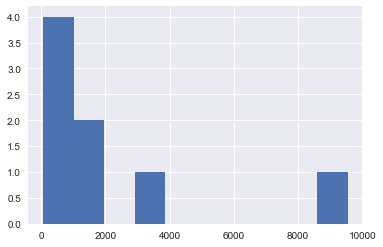

In [59]:
plt.hist(multdf.frequency)
plt.show()

In [60]:
#dir(scipy.stats)
import numpy as np
X = np.random.randint(8, size=(8, 3))
print(X)
y = np.array([0, 1, 2, 3, 4, 5, 6, 7])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
print(clf.predict(X[5:8]))
print(clf.predict_proba(X[5:8]))

[[5 2 4]
 [3 3 5]
 [4 1 2]
 [5 7 7]
 [2 2 2]
 [6 4 1]
 [4 7 4]
 [4 6 6]]
[5 6 7]
[[ 0.07120563  0.02370844  0.11445149  0.03992713  0.08614426  0.55417896
   0.07598233  0.03440177]
 [ 0.02673327  0.08203198  0.01521296  0.19093849  0.16361383  0.04529189
   0.28506323  0.19111434]
 [ 0.04942553  0.1637971   0.02126351  0.21565985  0.16939761  0.00803879
   0.15371889  0.21869872]]


**Continuous Probability Distribution**

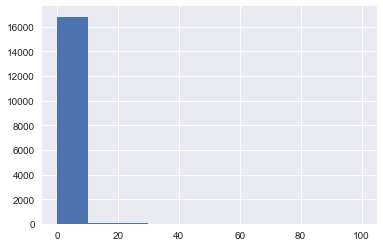

In [61]:
pricedf = df.price
pricedf.hist();

In [62]:
from scipy.stats import norm
μ, σ = norm.fit(pricedf)
print(μ)
print(σ)

0.361636888968
2.5128841998


In [63]:
import matplotlib.pyplot as plt
import numpy as np

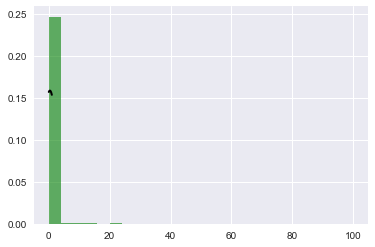

In [64]:
plt.hist(pricedf, bins=25, normed=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(0, 1, 500)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: mu = {:.2f},  std = {:.2f}".format(μ, σ)


Definitely NOT NORMAL

In [65]:
from scipy.stats import beta

In [66]:
pricedf.max(), pricedf.min()

(100, 0)

In [67]:
a, b, loc, scale = scipy.stats.beta.fit(pricedf, loc=0)
print(a, b, loc, scale)

/Users/jaichitra.balakrishnan/anaconda3/envs/stats/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:407: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*sqrt(a + b + 1) / (a + b + 2) / sqrt(a*b)
/Users/jaichitra.balakrishnan/anaconda3/envs/stats/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


0.44194663273 18.7420486751 0.999999999998 101.094137034


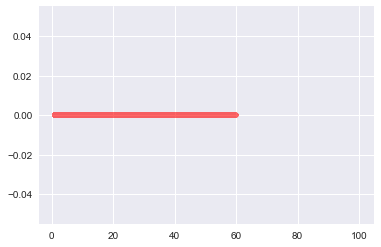

In [68]:
plt.plot(pricedf, beta.pdf(pricedf, a, b),'r-', lw=5, alpha=0.6, label='beta pdf');

In [69]:
fitted_beta = scipy.stats.beta(a, b)
fitted_beta_y = fitted_beta.pdf(pricedf)

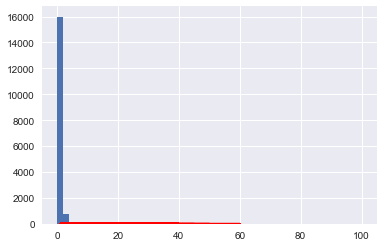

In [70]:
plt.hist(pricedf, bins=50)
plt.plot(pricedf, fitted_beta_y, 'r');

In [71]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

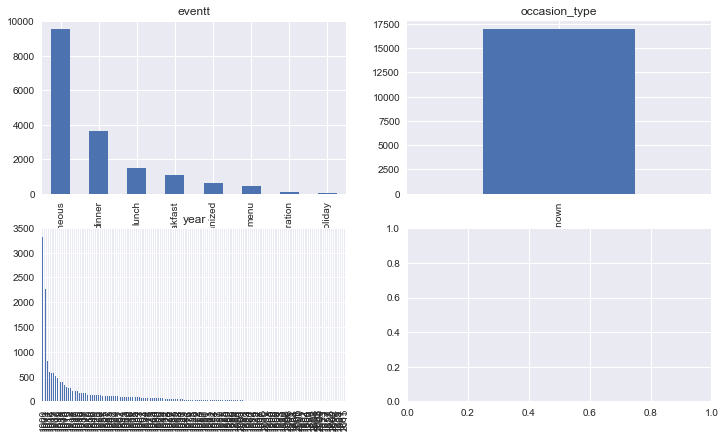

In [72]:
fig, axs = plt.subplots(2, 2, figsize=(12, 7))
df['eventt'].value_counts().plot(kind='bar', ax=axs[0][0], title='eventt')
df['occasion_type'].value_counts().plot(kind='bar', ax=axs[0][1], title='occasion_type')
df['year'].value_counts().plot(kind='bar', ax=axs[1][0], title='year');

**Linear Regression Fit Attempts - Price**

In [73]:
results = smf.ols(formula="price ~ year", data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     49.62
Date:                Thu, 09 Mar 2017   Prob (F-statistic):           1.94e-12
Time:                        16:57:03   Log-Likelihood:                -39666.
No. Observations:               16959   AIC:                         7.934e+04
Df Residuals:                   16957   BIC:                         7.935e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     11.1672      1.534      7.279      0.000         8.160    14.174
year          -0.0056      0.001     -7.044      0.000        -0.007    -0.004
==============================================================================
Omnibus:                    34150.592   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        104509026.222
Skew:                          16.652   Prob(JB):                         0.00
Kurtosis:                     386.131   Cond. No.                     1.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
results = smf.ols(formula="price ~ dish_count", data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.575
Date:                Thu, 09 Mar 2017   Prob (F-statistic):             0.0182
Time:                        16:57:03   Log-Likelihood:                -39688.
No. Observations:               16959   AIC:                         7.938e+04
Df Residuals:                   16957   BIC:                         7.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3961      0.024     16.367      0.000         0.349     0.444
dish_count    -0.0005      0.000     -2.361      0.018        -0.001 -7.81e-05
==============================================================================
Omnibus:                    34150.274   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        104383779.255
Skew:                          16.652   Prob(JB):                         0.00
Kurtosis:                     385.900   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
results = smf.ols(formula="price ~ year + eventt + occasion + status", data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.063
Method:                 Least Squares   F-statistic:                    0.3193
Date:                Thu, 09 Mar 2017   Prob (F-statistic):               1.00
Time:                        16:57:04   Log-Likelihood:                -8725.6
No. Observations:                3725   AIC:                         1.811e+04
Df Residuals:                    3398   BIC:                         2.014e+04
Df Model:                         326                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================================================
                                                                                                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                       4.3634     11.865      0.368      0.713       -18.899    27.626
eventt[T.celebration]                                                                                          -0.3054      0.375     -0.815      0.415        -1.040     0.430
eventt[T.dinner]                                                                                               -0.1507      0.162     -0.930      0.353        -0.468     0.167
eventt[T.holiday]                                                                                               0.3056      0.506      0.604      0.546        -0.687     1.299
eventt[T.lunch]                                                                                                 0.1093      0.184      0.593      0.553        -0.252     0.471
eventt[T.menu]                                                                                                 -0.5594      0.339     -1.652      0.099        -1.223     0.104
eventt[T.miscellaneous]                                                                                        -0.0963      0.238     -0.405      0.686        -0.562     0.370
eventt[T.organized]                                                                                             0.0450      0.209      0.215      0.830        -0.365     0.455
occasion[T.0ther  commemorative]                                                                               -0.2023      3.731     -0.054      0.957        -7.518     7.114
occasion[T.0ther  commercial]                                                                                   0.0133      3.729      0.004      0.997        -7.298     7.324
occasion[T.0ther  soc]                                                                                         -0.1868      3.731     -0.050      0.960        -7.503     7.129
occasion[T.10nth reunion]                                                                                      -0.0089      3.729     -0.002      0.998        -7.320     7.302
occasion[T.113 anniversary]                                                                                    -0.0311      3.730     -0.008      0.993        -7.344     7.281
occasion[T.13th anniversary]                                                                                   -0.0823      3.735     -0.022      0.982        -7.406     7.242
occasion[T.159nth anniversary dinner washington s birthday]                                

**GLM Attempt - Poisson Distribution for Change of rate of price**

In [76]:
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [77]:
results = smf.glm('price ~ eventt + occasion_type', 
              data=df, 
              offset=np.log(df.year), 
              family=sm.families.Poisson()).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  price   No. Observations:                16959
Model:                            GLM   Df Residuals:                    16951
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -20176.
Date:                Thu, 09 Mar 2017   Deviance:                       35468.
Time:                        16:57:04   Pearson chi2:                 2.82e+05
No. Iterations:                    10                                         
===========================================================================================
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  -7.7453      0.034   -229.763      0.000        -7.811    -7.679
eventt[T.celebration]     -11.5127     23.521     -0.489      0.625       -57.613    34.588
eventt[T.dinner]           -0.7080      0.043    -16.620      0.000        -0.792    -0.625
eventt[T.holiday]           0.8372      0.094      8.910      0.000         0.653     1.021
eventt[T.lunch]            -0.1414      0.045     -3.112      0.002        -0.230    -0.052
eventt[T.menu]             -3.2347      0.269    -12.008      0.000        -3.763    -2.707
eventt[T.miscellaneous]    -1.2068      0.039    -30.591      0.000        -1.284    -1.130
eventt[T.organized]        -1.0807      0.083    -13.057      0.000        -1.243    -0.918
===========================================================================================
"""

**Hypothesis Test**

H0 : M(dinner) > 0.41
HA : M(dinner) <= 0.41    

In [78]:
df[df.eventt=='dinner'].price.mean()

0.40561364887176665

In [79]:
import scipy.stats as stats
sample1 = df[df.eventt=='dinner'].price
sample2 = df[df.eventt=='breakfast'].price
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
print(t_stat, p_val)


-3.04615239075 0.00236199648117


Reject hypothesis that dinner prices are higher than breakfast prices

** CI for Mean Price **

In [80]:
df.price.mean()
n = len(df)
sem = df.price.std(ddof=1) / n ** 0.5
t_score = stats.t(n - 1).ppf(0.975)
lower_bound = df.price.mean() - t_score * sem
upper_bound = df.price.mean() + t_score * sem

In [81]:
print(lower_bound,upper_bound)

0.323813168113 0.399460609822
